In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd    
import xlrd
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [5]:
#!pip install xlrd==1.2.0

In [6]:
book = xlrd.open_workbook(filename='/content/drive/MyDrive/BTP/Result- Part-2/Statistics with activations/image25.xls')

dataset = pd.read_excel(book)

print(dataset) 

     area  equivalent_diameter  mean_intensity-0  orientation   perimeter  \
0     326            20.373416         55.907975     1.239168   83.148232   
1     591            27.431452         64.284264    -0.365923  124.568542   
2     670            29.207371         52.656716    -0.784113  124.396970   
3     583            27.245158         40.150943    -1.055924  110.083261   
4     602            27.685560         59.260797    -1.504285  120.290368   
..    ...                  ...               ...          ...         ...   
229   352            21.170270         56.781250    -0.012117   93.533009   
230   666            29.120054         70.370871    -0.082363  121.982756   
231   543            26.293898         76.581952    -1.488281  107.361436   
232   534            26.075082         62.822097     0.952953  143.189863   
233   386            22.169133         48.375648    -1.445841   93.805087   

     max_intensity-0  min_intensity-0  major_axis_length  minor_axis_length

In [51]:
x = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20]].values
#x = dataset.iloc[:, 30].values  

In [27]:
x

array([[3.26000000e+02, 2.03734163e+01, 5.59079755e+01, ...,
        1.60905767e+01, 2.55055927e-01, 4.87797945e-01],
       [5.91000000e+02, 2.74314522e+01, 6.42842640e+01, ...,
        2.49192429e+01, 2.10775876e-01, 1.31846743e+00],
       [6.70000000e+02, 2.92073706e+01, 5.26567164e+01, ...,
        2.49130733e+01, 1.85667119e-01, 1.47310096e+00],
       ...,
       [5.43000000e+02, 2.62938980e+01, 7.65819521e+01, ...,
        2.58622544e+01, 1.97719034e-01, 1.58125795e+00],
       [5.34000000e+02, 2.60750823e+01, 6.28220974e+01, ...,
        2.46699851e+01, 2.68145811e-01, 3.75779896e-01],
       [3.86000000e+02, 2.21691331e+01, 4.83756477e+01, ...,
        1.44384322e+01, 2.43018359e-01, 1.44854904e+00]])

In [28]:
x.shape

(234, 11)

In [29]:
# #Standard Scaler
# scaler = StandardScaler()
# # transform data
# scaled = scaler.fit_transform(x)
# print(scaled)
# x = scaled

In [30]:
# fit scaler on training data
norm = MinMaxScaler().fit(x)

# transform training data
x = norm.transform(x)
x

array([[0.02096011, 0.05259038, 0.54345165, ..., 0.02615882, 0.67800973,
        0.01162172],
       [0.08068515, 0.17044719, 0.68882705, ..., 0.16594532, 0.51163366,
        0.03300183],
       [0.09848997, 0.20010191, 0.48702414, ..., 0.16584764, 0.41729104,
        0.03698185],
       ...,
       [0.06986703, 0.15145203, 0.90226065, ..., 0.18087627, 0.46257442,
        0.03976564],
       [0.06783863, 0.14779819, 0.66345029, ..., 0.16199876, 0.72719313,
        0.00873855],
       [0.03448276, 0.0825757 , 0.41272368, ..., 0.        , 0.63278026,
        0.03634992]])

In [31]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

In [32]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [33]:
nm.sum(y_predict == 0)

89

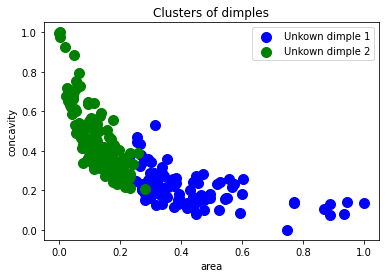

In [48]:
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 9], s = 100, c = 'blue', label = 'Unkown dimple 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 9], s = 100, c = 'green', label = 'Unkown dimple 2') #for second cluster    
#mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of dimples')  
mtp.xlabel(dataset.columns[0])
mtp.ylabel(dataset.columns[9])
# mtp.xlabel('Unkown dimple 1')  
# mtp.ylabel('Unkown dimple 2')  
mtp.legend()  
mtp.show() 

In [50]:
silhouette_scr = silhouette_score(x, y_predict)
print(silhouette_scr)

0.27071321687605676


In [46]:
calinski_harabasz_scr = calinski_harabasz_score(x, y_predict)
print(calinski_harabasz_scr)

103.3822070991017


In [47]:
davies_bouldin_scr = davies_bouldin_score(x, y_predict)
print(davies_bouldin_scr)

1.3655622202044198


In [22]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [23]:
df = pd.DataFrame(x)
x_t = df
df['Cluster'] = y_predict
# print(df['Cluster'].value_counts())
# df['Binary Cluster 0'] = df['Cluster'].map({0:1, 1:0, 9:0})
#print(df['Binary Cluster 0'])
print(df)

            0         1         2         3         4         5         6  \
0    0.052590  0.543452  0.908580  0.009300  0.404762  0.351852  0.059018   
1    0.170447  0.688827  0.387634  0.103243  0.785714  0.111111  0.105088   
2    0.200102  0.487024  0.251907  0.102854  0.690476  0.111111  0.118197   
3    0.167336  0.269979  0.163689  0.070390  0.666667  0.092593  0.117915   
4    0.174690  0.601642  0.018169  0.093540  0.880952  0.370370  0.149209   
..        ...       ...       ...       ...       ...       ...       ...   
229  0.065896  0.558608  0.502465  0.032853  0.785714  0.111111  0.067758   
230  0.198644  0.794464  0.479666  0.097379  0.880952  0.703704  0.085820   
231  0.151452  0.902261  0.023363  0.064217  0.976190  0.648148  0.058388   
232  0.147798  0.663450  0.815686  0.145477  0.690476  0.407407  0.119960   
233  0.082576  0.412724  0.037138  0.033470  0.666667  0.259259  0.117198   

            7         8         9  Cluster  
0    0.026159  0.678010  0.011

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(

         random_state = 42)
rf.fit(x, df['Cluster'])
print(rf.feature_importances_)

[0.39239736 0.01343261 0.02167828 0.13028654 0.00784725 0.00866208
 0.19265453 0.13767671 0.08423092 0.01113372]


Index(['area', 'equivalent_diameter', 'mean_intensity-0', 'orientation',
       'perimeter', 'max_intensity-0', 'min_intensity-0', 'major_axis_length',
       'minor_axis_length', 'concavity', 'marker num', 'VGG16_160_mean',
       'VGG16_160_var', 'VGG16_320_mean', 'VGG16_320_var', 'VGG19_160_mean',
       'VGG19_160_var', 'VGG19_320_mean', 'VGG19_320_var',
       'ResNet152_160_mean', 'ResNet152_160_var', 'ResNet152_320_mean',
       'ResNet152_320_var', 'InceptionV3_160_mean', 'InceptionV3_160_var',
       'InceptionV3_320_mean', 'InceptionV3_320_var', 'DenseNet201_160_mean',
       'DenseNet201_160_var', 'DenseNet201_320_mean', 'DenseNet201_320_var'],
      dtype='object')

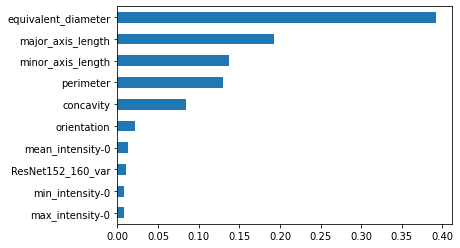

In [25]:
from matplotlib.pyplot import figure
feat_importances = pd.Series(rf.feature_importances_, index = dataset.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 20]]).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')
dataset.columns


In [ ]:
## from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(random_state=1)
# clf.fit(df[[0, 9]].values, df["Binary Cluster 0"].values)

# # Index sort the most important features
# sorted_feature_weight_idxes = nm.argsort(clf.feature_importances_)[::-1] # Reverse sort

# # Get the most important features names and weights
# most_important_features = nm.take_along_axis(
#     nm.array(df.iloc[:, 1:].columns.tolist()), 
#     sorted_feature_weight_idxes, axis=0)
# most_important_weights = nm.take_along_axis(
#     nm.array(clf.feature_importances_), 
#     sorted_feature_weight_idxes, axis=0)

# # Show
# list(zip(most_important_features, most_important_weights))

# # [('Feature1', 0.59), ('Feature2', 0.41)]